In [1]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

import pandas as pd

df1 = pd.read_csv("./IWSLT14-Alpha.csv")
df2 = pd.read_csv("./IWSLT15-Alpha.csv")
df3 = pd.read_csv("./Multi30K-Alpha.csv")
dfs = [df1, df2, df3]

In [2]:
df.keys()

NameError: name 'df' is not defined

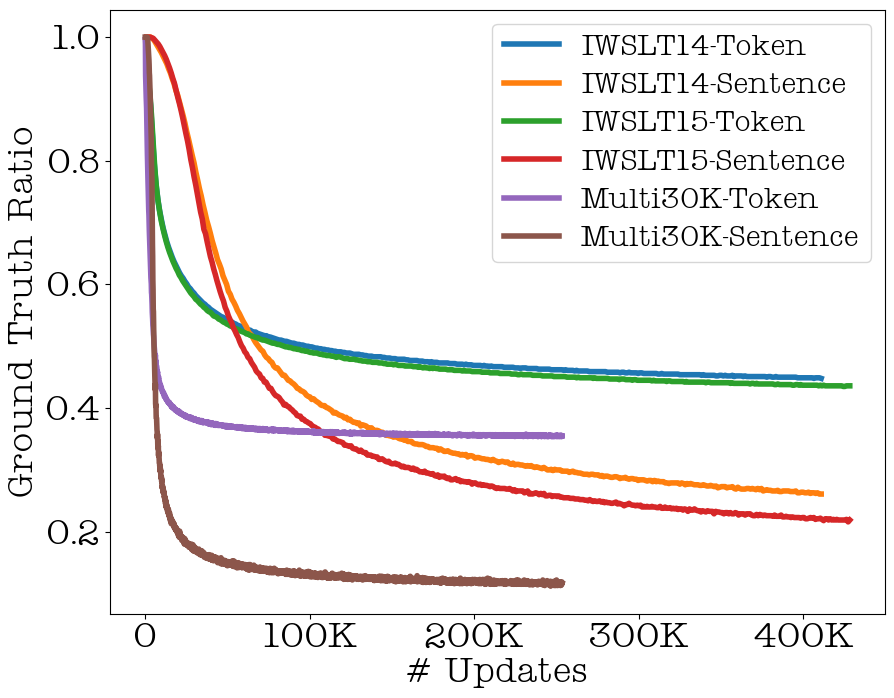

In [4]:

#ls = df["LS-0.1"].tolist()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tick
plt.rc("font", family="teletype")
plt.rcParams.update({'font.size': 25})
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.dpi"] = 100
fig, ax = plt.subplots()
plt.ylabel("Ground Truth Ratio")
plt.xlabel("# Updates")
#ax.plot([1,2,3,4])
for df in dfs:
    for key in df.keys():
        if key == "STEP":
            index=df[key]
        else:
            y = df[key]
            marker_y = df[key].last_valid_index()
            ax.plot(index, y, label=key, linewidth=4.0)
            #ax.scatter(index[marker_y], y=df[key][marker_y], c='black', marker="x")
                
            #ax.annotate(f"BLEU:{bleu[key]}", (index[marker_y], df[key][marker_y]), fontsize=12, ha='center')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# for i, label in enumerate(labels):
#     labels[i] = human_format(int(label))
# ax.set_xticklabels(labels)
legend_properties = {'weight':'bold'}
#plt.legend(loc="lower right", prop=legend_properties)
plt.legend(loc="upper right", fontsize=20)
#plt.show()

In [5]:
fig.savefig("ExpectedAlpha.png", bbox_inches='tight')